# Convolutional Neural Networks: Step by Step
Chào mừng bạn đến với bài tập đầu tiên của Khóa 4! Trong bài tập này, bạn sẽ triển khai các lớp tích hợp (CONV) và gộp (POOL) trong không gian phức tạp, bao gồm cả truyền tiến và truyền ngược (tùy chọn).
Kí hiệu :

* Chỉ số trên $[l]$ biểu thị một đối tượng của lth lớp.

  * Thí dụ: $a[4]$ là $4^{th}$ kích hoạt lớp. $W[5]$ và $b[5]$ là $5^{th}$ tham số lớp.

* Chỉ số trên (i) biểu thị một đối tượng từ ith thí dụ.

  * Thí dụ: $x(i)$ là $i^{th}$ đầu vào ví dụ đào tạo.
* Chỉ số dưới $x^{(i)}$ biểu thị  $i^{th}$ mục nhập của một vectơ.

  * Thí dụ: $a^{[l]}_i$ biểu thị $i^{th}$ mục nhập của các kích hoạt trong lớp * $l$, giả sử đây là một lớp (FC) được kết nối đầy đủ.
nH, nW và nCbiểu thị tương ứng là chiều cao, chiều rộng và số kênh của một lớp nhất định. Nếu bạn muốn tham chiếu đến một lớp cụ thểl, bạn cũng có thể viết $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$.

* $n_H$, $n_W$ and $n_C$ biểu thị tương ứng là chiều cao, chiều rộng và số kênh của lớp trước đó. Nếu tham chiếu đến một lớp cụ thểl, điều này cũng có thể được biểu thị $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$.

Chúng tôi giả định rằng bạn đã quen thuộc numpyvà / hoặc đã hoàn thành các khóa học trước đó của chuyên ngành. Bắt đầu nào!

## <font color='darkblue'>Updates</font>

#### If you were working on the notebook before this update...
* Máy tính xách tay hiện tại là phiên bản "v2a".
* Bạn có thể tìm thấy tác phẩm gốc của mình được lưu trong sổ ghi chép với tên phiên bản trước đó ("v2")
* Để xem thư mục tệp, hãy chuyển đến menu "Tệp-> Mở", và thao tác này sẽ mở ra một tab mới hiển thị thư mục tệp.

#### Danh sách cập nhật
* làm rõ ví dụ được sử dụng cho chức năng đệm. Đã cập nhật mã khởi động cho chức năng đệm.
* `convert_osystem` có các gợi ý bổ sung để giúp sinh viên nếu họ gặp khó khăn.
* `var_ntic` đặt mã cho` vert_start` và `vert_end` trong vòng lặp` for h in range (...) `; để tránh tính toán thừa. Cập nhật tương tự như `Horiz_start` và` Horiz_end`. **Cảm ơn người cố vấn Kevin Brown của chúng tôi đã chỉ ra điều này**
* `vari_osystem` chia nhỏ phép tính dòng đơn` Z [i, h, w, c] `thành 3 dòng để rõ ràng.
* Kiểm tra trường hợp kiểm tra `chuyển_trên` để đảm bảo rằng sinh viên không vô tình sử dụng n_H_prev thay vì n_H, hãy sử dụng n_W_prev thay vì n_W và không vô tình hoán đổi n_H với n_W
* `pool_ntic` lồng đúng cách các phép tính của` vert_start`, `vert_end`,` Horiz_start` và `Horiz_end` để tránh các phép tính thừa.
* `pool_ntic 'có hai trường hợp thử nghiệm mới để kiểm tra việc triển khai bước chạy chính xác (chiều cao và chiều rộng của các kích hoạt của lớp trước đó phải đủ lớn so với kích thước bộ lọc để có thể thực hiện bước chạy).
* `vari_backward`: khởi tạo các biến` Z` và `cache` trong kiểm thử đơn vị, để làm cho nó độc lập với kiểm thử đơn vị xảy ra trong phần` chuyển đổi tiếp theo` của bài tập.
* **Rất cảm ơn người cố vấn khóa học của chúng tôi, Paul Mielke, đã đề xuất các trường hợp thử nghiệm này.**

## 1 - Packages
Đầu tiên, hãy nhập tất cả các gói mà bạn sẽ cần trong quá trình chuyển nhượng này.
- [numpy](www.numpy.org) là gói cơ bản cho tính toán khoa học với Python.
- [matplotlib](http://matplotlib.org) là một thư viện để vẽ đồ thị bằng Python.
- np.random.seed (1) được sử dụng để giữ cho tất cả các lệnh gọi hàm ngẫu nhiên nhất quán. Nó sẽ giúp chúng tôi đánh giá công việc của bạn.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Outline of the Assignment
Bạn sẽ triển khai các khối xây dựng của một mạng nơ-ron phức hợp! Mỗi chức năng bạn sẽ triển khai sẽ có hướng dẫn chi tiết hướng dẫn bạn qua các bước cần thiết:

- Các chức năng chuyển đổi, bao gồm:
     -- Zero Padding
    - Convolve window 
    - Convolution forward
    - Convolution backward (optional)
- Các chức năng gộp, bao gồm:
      Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward (optional)
    
Sổ tay này sẽ yêu cầu bạn thực hiện các chức năng này từ đầu trong `numpy`. Trong sổ tay tiếp theo, bạn sẽ sử dụng TensorFlow tương đương của các chức năng này để xây dựng mô hình sau:
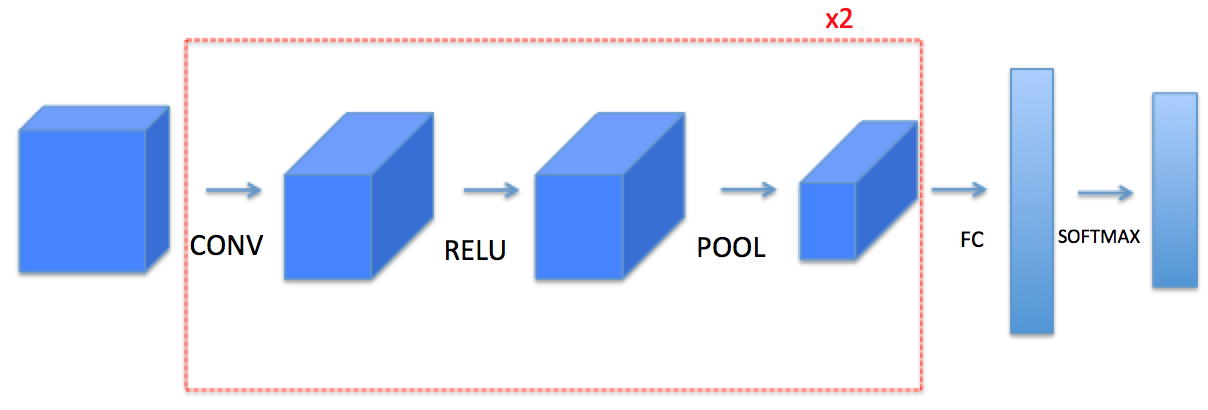

**Lưu ý** rằng đối với mỗi hàm tiến, có tương đương lùi tương ứng của nó. Do đó, ở mỗi bước của mô-đun chuyển tiếp, bạn sẽ lưu trữ một số tham số trong bộ nhớ cache. Các tham số này được sử dụng để tính toán độ dốc trong quá trình nhân giống ngược.

## 3 - Convolutional Neural Networks
Mặc dù các khuôn khổ lập trình giúp cho việc sử dụng phức hợp trở nên dễ dàng, nhưng chúng vẫn là một trong những khái niệm khó hiểu nhất trong Học sâu. Một lớp tích chập biến đổi một khối lượng đầu vào thành một khối lượng đầu ra có kích thước khác nhau, như được hiển thị bên dưới.

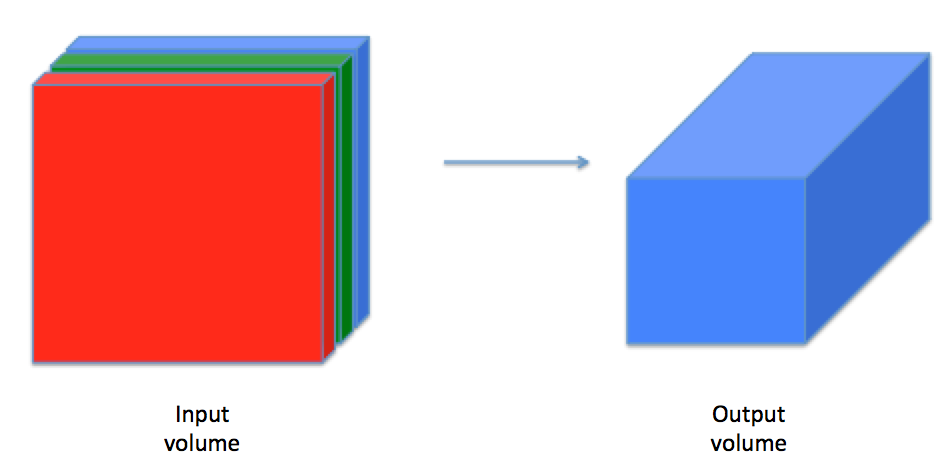

Trong phần này, bạn sẽ xây dựng từng bước của lớp tích chập. Trước tiên, bạn sẽ triển khai hai hàm trợ giúp: một cho không đệm và hàm kia để tính toán chính hàm tích chập

### 3.1 - Zero-Padding
Zero-padding thêm các số không xung quanh đường viền của hình ảnh:
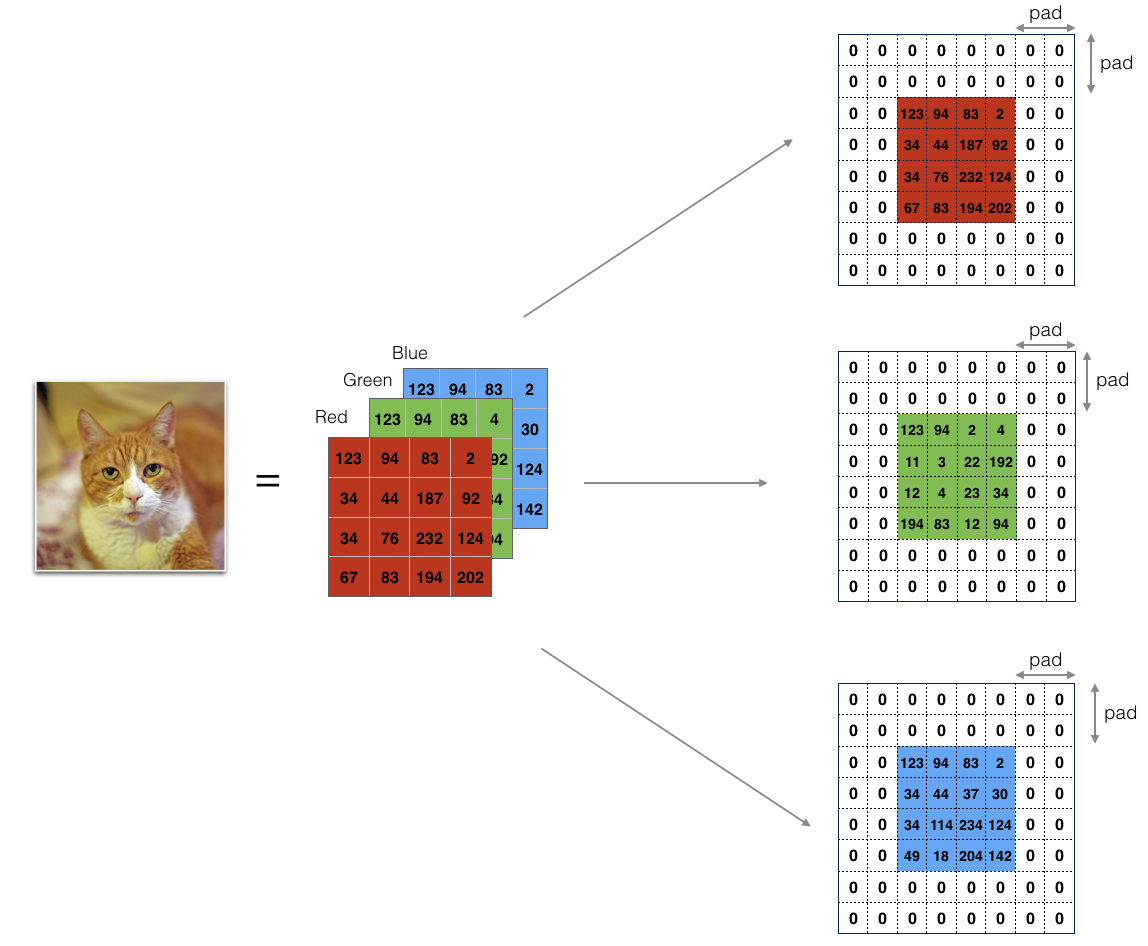
**Hình 1** </u> <font color = 'Purple'>: **Zero-Paddin** <br> Hình ảnh (3 kênh, RGB) với khoảng đệm là 2. </center> </caption>
Những lợi ích chính của đệm là sau:

- Nó cho phép bạn sử dụng một lớp CONV mà không nhất thiết phải thu nhỏ chiều cao và chiều rộng của khối lượng. Điều này rất quan trọng đối với việc xây dựng các mạng sâu hơn, vì nếu không thì chiều cao / chiều rộng sẽ thu hẹp khi bạn đi đến các lớp sâu hơn. Một trường hợp đặc biệt quan trọng là tích chập "giống nhau", trong đó chiều cao / chiều rộng được bảo toàn chính xác sau một lớp.

- Nó giúp chúng tôi lưu giữ nhiều thông tin hơn ở biên giới của hình ảnh. Nếu không có phần đệm, rất ít giá trị ở lớp tiếp theo sẽ bị ảnh hưởng bởi các pixel dưới dạng các cạnh của hình ảnh.

**Bài tập**: Thực hiện hàm sau, hàm này chèn tất cả các hình ảnh của một loạt ví dụ X bằng các số không. [Sử dụng np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). Lưu ý nếu bạn muốn đệm mảng "a" của hình $ (5,5,5,5,5) $ với `pad = 1` cho kích thước thứ 2,` pad = 3` cho kích thước thứ 4 và `pad = 0` cho phần còn lại, bạn sẽ làm:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))
```

In [2]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0,0),(pad,pad),(pad,pad),(0,0)), mode='constant', constant_values = (0,0))
    ### END CODE HERE ###
    
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


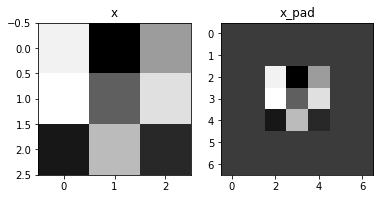

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

### 3.2 - Single step of convolution 
Trong phần này, hãy triển khai một bước tích chập duy nhất, trong đó bạn áp dụng bộ lọc cho một vị trí duy nhất của đầu vào. Điều này sẽ được sử dụng để xây dựng một đơn vị tích hợp, mà:

- Lấy một khối lượng đầu vào
- Áp dụng bộ lọc ở mọi vị trí của đầu vào
- Đầu ra một khối lượng khác (thường có kích thước khác nhau)

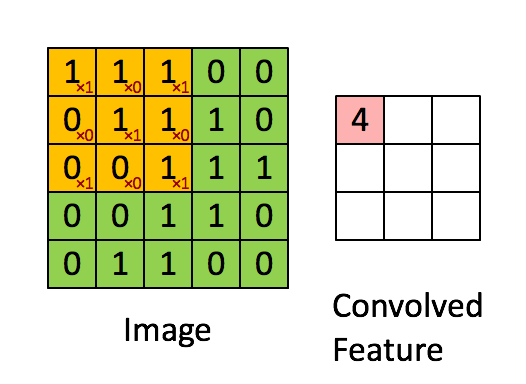

**Figure 2** </u><font color='purple'>  : **Convolution operation**<br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>

Trong ứng dụng thị giác máy tính, mỗi giá trị trong ma trận bên trái tương ứng với một giá trị pixel duy nhất và chúng tôi kết hợp bộ lọc 3x3 với hình ảnh bằng cách nhân các giá trị của nó theo phần tử với ma trận ban đầu, sau đó tổng chúng lại và thêm độ lệch . Trong bước đầu tiên của bài tập này, bạn sẽ thực hiện một bước tích chập duy nhất, tương ứng với việc áp dụng bộ lọc cho chỉ một trong các vị trí để có được một đầu ra có giá trị thực duy nhất.

Sau đó trong sổ tay này, bạn sẽ áp dụng hàm này cho nhiều vị trí của đầu vào để triển khai hoạt động tích hợp đầy đủ.

**Bài tập**: Thực hiện hàm chuyển đổi (). [Gợi ý](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).

Lưu ý: Biến b sẽ được chuyển vào dưới dạng một mảng numpy. Nếu chúng ta thêm một đại lượng vô hướng (một số thực hoặc một số nguyên) vào một mảng numpy, thì kết quả là một mảng numpy. Trong trường hợp đặc biệt khi một mảng numpy chứa một giá trị duy nhất, chúng ta có thể ép kiểu nó như một float để chuyển nó thành một giá trị vô hướng.

In [4]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev,W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z+np.float(b)
    ### END CODE HERE ###

    return Z

In [5]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


### 3.3 - Convolutional Neural Networks - Forward pass
Trong chuyển tiếp, bạn sẽ lấy nhiều bộ lọc và biến chúng trên đầu vào. Mỗi 'tích chập' cung cấp cho bạn một đầu ra ma trận 2D. Sau đó, bạn sẽ xếp chồng các đầu ra này để có được khối lượng 3D:



In [6]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/MyDrive/images/conv_kiank.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


In [7]:
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

**Tập thể dục**:
Triển khai chức năng bên dưới để chuyển đổi các bộ lọc `W` khi kích hoạt đầu vào` A_prev`.
Hàm này nhận các đầu vào sau:
* `A_prev`, kết quả kích hoạt của lớp trước đó (cho một loạt m đầu vào);
* Trọng lượng được ký hiệu là `W`. Kích thước cửa sổ bộ lọc là `f` x` f`.
* Vectơ thiên vị là `b`, trong đó mỗi bộ lọc có độ lệch (đơn) riêng.

Cuối cùng, bạn cũng có quyền truy cập vào từ điển hyperparameters chứa bước và phần đệm.

**Dấu**:
1. Để chọn lát cắt 2x2 ở góc trên bên trái của ma trận "a_prev" (shape (5,5,3)), bạn sẽ thực hiện:
``` python
a_slice_prev = a_prev [0: 2,0: 2 ,:]
```



Lưu ý cách điều này tạo ra một lát cắt 3D có chiều cao 2, chiều rộng 2 và chiều sâu 3. Độ sâu là số lượng kênh.
Điều này sẽ hữu ích khi bạn định nghĩa `a_slice_prev` bên dưới, sử dụng các chỉ mục` start / end` mà bạn sẽ xác định.
2. Để xác định a_slice, trước tiên bạn cần xác định các góc của nó `vert_start`,` vert_end`, `Horiz_start` và` Horiz_end`. Hình này có thể hữu ích cho bạn trong việc tìm hiểu cách xác định mỗi góc bằng cách sử dụng h, w, f và s trong đoạn mã dưới đây.


![](https://drive.google.com/uc?export=view&id=1MidVmd8NCDL1hxzU4tkq_AwtQ9-LjqbU)

<caption><center> <u> <font color='purple'> 
**Figure 3** </u><font color='purple'>  : **Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)** <br> This figure shows only a single channel.  </center></caption>

**Nhắc nhở**:
Các công thức liên quan hình dạng đầu ra của tích chập với hình dạng đầu vào là:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$
Đối với bài tập này, chúng tôi sẽ không lo lắng về vectơ hóa, và sẽ chỉ thực hiện mọi thứ với vòng lặp for.

#### Gợi ý bổ sung nếu bạn gặp khó khăn


* Bạn sẽ muốn sử dụng phương pháp cắt mảng (ví dụ: `varname [0: 1,:, 3: 5] `) cho các biến sau:
   `a_prev_pad`,` W`, `b`
   Sao chép mã khởi động của hàm và chạy nó bên ngoài hàm đã xác định, trong các ô riêng biệt.
   Kiểm tra xem tập hợp con của mỗi mảng có phải là kích thước và thứ nguyên mà bạn mong đợi hay không.
* Để quyết định cách lấy vert_start, vert_end; Horiz_start, Horiz_end, hãy nhớ rằng đây là các chỉ số của lớp trước.
   Vẽ một ví dụ về lớp đệm trước đó (ví dụ: 8 x 8) và hiện tại (lớp đầu ra) (2 x 2 chẳng hạn).
   Các chỉ số của lớp đầu ra được ký hiệu là `h` và` w`.
* Đảm bảo rằng `a_slice_prev` có chiều cao, chiều rộng và chiều sâu.
* Hãy nhớ rằng `a_prev_pad` là một tập con của` A_prev_pad`.
   Suy nghĩ về cái nào nên được sử dụng trong vòng lặp for.

In [8]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']

    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    n_H = int(((n_H_prev-f+2*pad)/stride)+1)
    n_W = int(((n_W_prev-f+2*pad)/stride)+1)
    print(n_H)
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    print(n_W)
    #Create A_prev_pad by padding A_prev
    A_prev_pad = np.pad(A_prev, ((0,0),(pad,pad),(pad,pad),(0,0)), mode='constant', constant_values = (0,0))
    
    for i in range(m):              # vòng lặp qua loạt ví dụ đào tạo
        a_prev_pad = A_prev_pad[i,:]             # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h*stride
            vert_end = vert_start+f
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start =w*stride 
                horiz_end = horiz_start+f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start: vert_end,horiz_start:horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[:, :, :, c]
                    bias = b[:, :, :, c]
                    Z[i, h, w, c] =  conv_single_step(a_slice_prev, weights , bias )
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [9]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

3
4
Z's mean =
 0.6923608807576933
Z[3,2,1] =
 [-1.28912231  2.27650251  6.61941931  0.95527176  8.25132576  2.31329639
 13.00689405  2.34576051]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Cuối cùng, lớp CONV cũng phải chứa một kích hoạt, trong trường hợp đó, chúng tôi sẽ thêm dòng mã sau:
```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```
Bạn không cần phải làm điều đó ở đây.

## 4 - Pooling layer 
Lớp gộp (POOL) làm giảm chiều cao và chiều rộng của đầu vào. Nó giúp giảm việc tính toán, cũng như giúp các bộ phát hiện tính năng bất biến hơn so với vị trí của nó trong đầu vào. Hai loại lớp gộp là:

- Max-pooling layer: trình chiếu một cửa sổ ($ f, f $) trên đầu vào và lưu trữ giá trị lớn nhất của cửa sổ trong đầu ra.

- Lớp tổng hợp trung bình: trình chiếu một cửa sổ ($ f, f $) trên đầu vào và lưu trữ giá trị trung bình của cửa sổ trong đầu ra.
![](

![](https://drive.google.com/uc?export=view&id=1cktmM0LFgr8QzC0ycMc4a-812dB0tr5a)



![](https://drive.google.com/uc?export=view&id=1cktmM0LFgr8QzC0ycMc4a-812dB0tr5a)

Các lớp gộp này không có tham số để đào tạo backpropagation. Tuy nhiên, chúng có các siêu tham số như kích thước cửa sổ $ f $. Điều này chỉ định chiều cao và chiều rộng của cửa sổ $ f \times f $ mà bạn sẽ tính *max* hoặc *trung bình* trên.

### 4.1 - Forward Pooling
Bây giờ, bạn sẽ triển khai MAX-POOL và AVG-POOL, trong cùng một chức năng.

**Bài tập**: Thực hiện chuyển tiếp của lớp gộp. Thực hiện theo các gợi ý trong các bình luận bên dưới.

**Nhắc nhở**:
Vì không có phần đệm, các công thức liên kết hình dạng đầu ra của tổng thể với hình dạng đầu vào là:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [10]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m): 
        a_prev = A_prev[i,:]     # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h*stride
            vert_end = vert_start+f
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w*stride
                horiz_end = horiz_start +f
                
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = a_prev[vert_start:vert_end,horiz_start:horiz_end,c]
                    
#                     Compute the pooling operation on the slice. 
#                     Use an if statement to differentiate the modes. 
#                     Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice )
                    elif mode == "average":
                        A[i, h, w, c] = np.average(a_prev_slice )
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [11]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [

In [12]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 2, 2, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 2, 2, 3)
A =
 [[[[-0.03010467 -0.00324021 -0.33629886]
   [ 0.12893444  0.22242847  0.1250676 ]]

  [[-0.38268052  0.23257995  0.6259979 ]
   [-0.09525515  0.268511    0.46605637]]]


 [[[-0.17313416  0.32377198 -0.34317572]
   [ 0.02030094  0.14141479 -0.01231585]]

  [[ 0.42944926  0.08446996 -0.27290905]
   [ 0.15077452  0.28911175  0.00123239]]]]


Xin chúc mừng! Bây giờ bạn đã thực hiện chuyển tiếp của tất cả các lớp của một mạng phức hợp.

Phần còn lại của sổ ghi chép này là tùy chọn và sẽ không được tính điểm.

## 5 - Backpropagation in convolutional neural networks (OPTIONAL / UNGRADED)
Trong các khung công tác học sâu hiện đại, bạn chỉ phải thực hiện chuyển tiếp và khung sẽ xử lý chuyển tiếp lùi, vì vậy hầu hết các kỹ sư học sâu không cần phải bận tâm đến các chi tiết của chuyển lùi. Việc chuyển ngược trở lại cho các mạng chập là phức tạp. Nếu muốn, bạn có thể làm việc thông qua phần tùy chọn này của sổ ghi chép để biết được backprop trong một mạng phức hợp trông như thế nào.

Khi trong một khóa học trước đó, bạn triển khai một mạng nơ-ron đơn giản (được kết nối đầy đủ), bạn đã sử dụng phương pháp truyền ngược để tính toán các dẫn xuất liên quan đến chi phí để cập nhật các tham số. Tương tự, trong mạng nơron tích chập, bạn có thể tính toán các dẫn xuất liên quan đến chi phí để cập nhật các tham số. Các phương trình backprop không hề nhỏ và chúng tôi đã không tính toán chúng trong bài giảng, nhưng chúng tôi sẽ trình bày ngắn gọn chúng dưới đây.

### 5.1 - Convolutional layer backward pass 
Hãy bắt đầu bằng cách thực hiện chuyển ngược lại cho một lớp CONV.
#### 5.1.1 - Computing dA:
Đây là công thức tính $dA$ liên quan đến chi phí cho một bộ lọc nhất định $ W_c $ và một ví dụ đào tạo nhất định:

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

Trong đó $W_c$ là một bộ lọc và $dZ_{hw}$ là một đại lượng vô hướng tương ứng với gradient của chi phí đối với đầu ra của lớp đối lưu Z ở hàng thứ h và cột thứ w (tương ứng với sản phẩm chấm được lấy tại thứ i sải chân trái và sải chân thứ j). Lưu ý rằng tại mỗi thời điểm, chúng tôi nhân cùng một bộ lọc $ W_c $ với một dZ khác khi cập nhật dA. Chúng tôi làm như vậy chủ yếu là vì khi tính toán sự lan truyền chuyển tiếp, mỗi bộ lọc được chấm và tính tổng bằng một a_slice khác nhau. Do đó, khi tính toán backprop cho dA, chúng ta chỉ thêm gradient của tất cả các a_slices.

Trong mã, bên trong vòng lặp for thích hợp, công thức này chuyển thành:
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```
#### 5.1.2 - Computing dW:
Đây là công thức tính $ dWc $ ($ dWc $ là dẫn xuất của một bộ lọc) liên quan đến sự mất mát:
$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$
Trong đó $ a_ {slice} $ tương ứng với phần được sử dụng để tạo kích hoạt $ Z_ {ij} $. Do đó, điều này kết thúc cho chúng ta gradient cho $ W $ đối với lát cắt đó. Vì nó giống nhau $ W $, chúng tôi sẽ chỉ cộng tất cả các gradient như vậy để có $ dW $.

Trong mã, bên trong vòng lặp for thích hợp, công thức này chuyển thành:
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

#### 5.1.3 - Computing db:
Đây là công thức tính $ db $ liên quan đến chi phí cho một bộ lọc nhất định $ W_c $:

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Như bạn đã thấy trước đây trong các mạng nơ-ron cơ bản, db được tính bằng tổng $ dZ $. Trong trường hợp này, bạn chỉ tính tổng trên tất cả các độ dốc của kết quả chuyển đổi (Z) liên quan đến chi phí.

Trong mã, bên trong vòng lặp for thích hợp, công thức này chuyển thành:
```python
db[:,:,:,c] += dZ[i, h, w, c]
```
**Bài tập**: Thực hiện hàm `chuyển tiếp ngược lại` dưới đây. Bạn nên tổng hợp tất cả các ví dụ đào tạo, bộ lọc, chiều cao và chiều rộng. Sau đó, bạn nên tính các đạo hàm theo công thức 1, 2 và 3 ở trên.

In [13]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i,:,]
        da_prev_pad = dA_prev_pad[i,:,]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h*stride
                    vert_end = vert_start + f
                    horiz_start = w*stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [14]:
# We'll run conv_forward to initialize the 'Z' and 'cache_conv",
# which we'll use to test the conv_backward function
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

# Test conv_backward
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

4
4
dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


## 5.2 Pooling layer - backward pass
Tiếp theo, hãy triển khai ngược lại cho lớp gộp, bắt đầu với lớp MAX-POOL. Mặc dù một lớp gộp không có tham số để cập nhật backprop, bạn vẫn cần sao chép ngược gradient thông qua lớp gộp để tính toán gradient cho các lớp có trước lớp gộp.

### 5.2.1 Max pooling - backward pass  
Trước khi nhảy vào backpropagation của lớp gộp, bạn sẽ xây dựng một hàm trợ giúp có tên là `create_mask_from_window ()` thực hiện như sau:
$$ X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$$
Như bạn có thể thấy, hàm này tạo ra một ma trận "mặt nạ" để theo dõi vị trí tối đa của ma trận. Đúng (1) cho biết vị trí của giá trị lớn nhất trong X, các mục khác là Sai (0). Sau đó, bạn sẽ thấy rằng đường chuyền ngược cho tổng hợp trung bình sẽ tương tự như điều này nhưng sử dụng một mặt nạ khác.
**Bài tập**: Thực hiện `create_mask_from_window ()`. Chức năng này sẽ hữu ích cho việc gộp ngược lại.
Gợi ý:
- [np.max ()]() có thể hữu ích. Nó tính toán tối đa của một mảng.
- Nếu bạn có ma trận X và vô hướng x: `A = (X == x)` sẽ trả về ma trận A có cùng kích thước với X sao cho:
```
A[i,j] = True if X[i,j] = x
A[i,j] = False if X[i,j] != x
```
- Ở đây, bạn không cần phải xem xét các trường hợp có một số cực đại trong một ma trận.

In [15]:
  
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = (x==np.max(x))
    ### END CODE HERE ###
    
    return mask

In [16]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


Tại sao chúng ta theo dõi vị trí của giá trị tối đa? Đó là bởi vì đây là giá trị đầu vào cuối cùng ảnh hưởng đến đầu ra và do đó là chi phí. Backprop là tính toán gradient liên quan đến chi phí, vì vậy bất kỳ thứ gì ảnh hưởng đến chi phí cuối cùng phải có gradient khác 0. Vì vậy, backprop sẽ "truyền" gradient trở lại giá trị đầu vào cụ thể này đã ảnh hưởng đến chi phí.

### 5.2.2 - Average pooling - backward pass 
Trong tổng hợp tối đa, đối với mỗi cửa sổ đầu vào, tất cả "ảnh hưởng" đến đầu ra đến từ một giá trị đầu vào duy nhất - giá trị tối đa. Trong tổng hợp trung bình, mọi phần tử của cửa sổ đầu vào đều có ảnh hưởng như nhau đến kết quả đầu ra. Vì vậy, để triển khai backprop, bây giờ bạn sẽ triển khai một chức năng trợ giúp phản ánh điều này.

Ví dụ: nếu chúng tôi đã gộp trung bình trong lượt chuyển tiếp bằng cách sử dụng bộ lọc 2x2, thì mặt nạ bạn sẽ sử dụng cho đường chuyền lùi sẽ giống như sau:
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}$$
Điều này ngụ ý rằng mỗi vị trí trong ma trận $ dZ $ đóng góp như nhau vào sản lượng vì trong chuyển tiếp, chúng tôi lấy giá trị trung bình.

**Bài tập**: Thực hiện hàm dưới đây để phân phối đều một giá trị dz thông qua một ma trận có hình dạng kích thước. [Gợi ý](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html)


In [17]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = dz/shape[0]/shape[1]
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * average
    ### END CODE HERE ###
    
    return a

In [18]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


### 5.2.3 Putting it together: Pooling backward 
Bây giờ bạn có mọi thứ bạn cần để tính toán truyền ngược trên một lớp gộp.

**Bài tập**: Thực hiện hàm `pool_backward` ở cả hai chế độ (` "max" `và` "average" `). Một lần nữa, bạn sẽ sử dụng 4 vòng lặp for (lặp lại các ví dụ đào tạo, chiều cao, chiều rộng và kênh). Bạn nên sử dụng câu lệnh `if / elif` để xem liệu chế độ có bằng với` `max '' hay` `trung bình '' hay không. Nếu nó bằng 'trung bình', bạn nên sử dụng hàm `distribute_value() `mà bạn đã triển khai ở trên để tạo một ma trận có cùng hình dạng với `a_slice`. Nếu không, chế độ này bằng '' max '' và bạn sẽ tạo một mặt nạ với `create_mask_from_window () 'và nhân nó với giá trị tương ứng của dA.

In [19]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):                       # loop over the training examples
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        # Get the value a from dA (≈1 line)
                        da = dA[i, h, w, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [20]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


### Congratulations !
Chúc mừng bạn đã hoàn thành bài tập này. Bây giờ bạn đã hiểu cách hoạt động của mạng nơ-ron phức hợp. Bạn đã triển khai tất cả các khối xây dựng của mạng nơ-ron. Trong bài tập tiếp theo, bạn sẽ triển khai Mạng Conv bằng TensorFlow.